In [3]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#importing the dataset
df = pd.read_csv('/content/diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


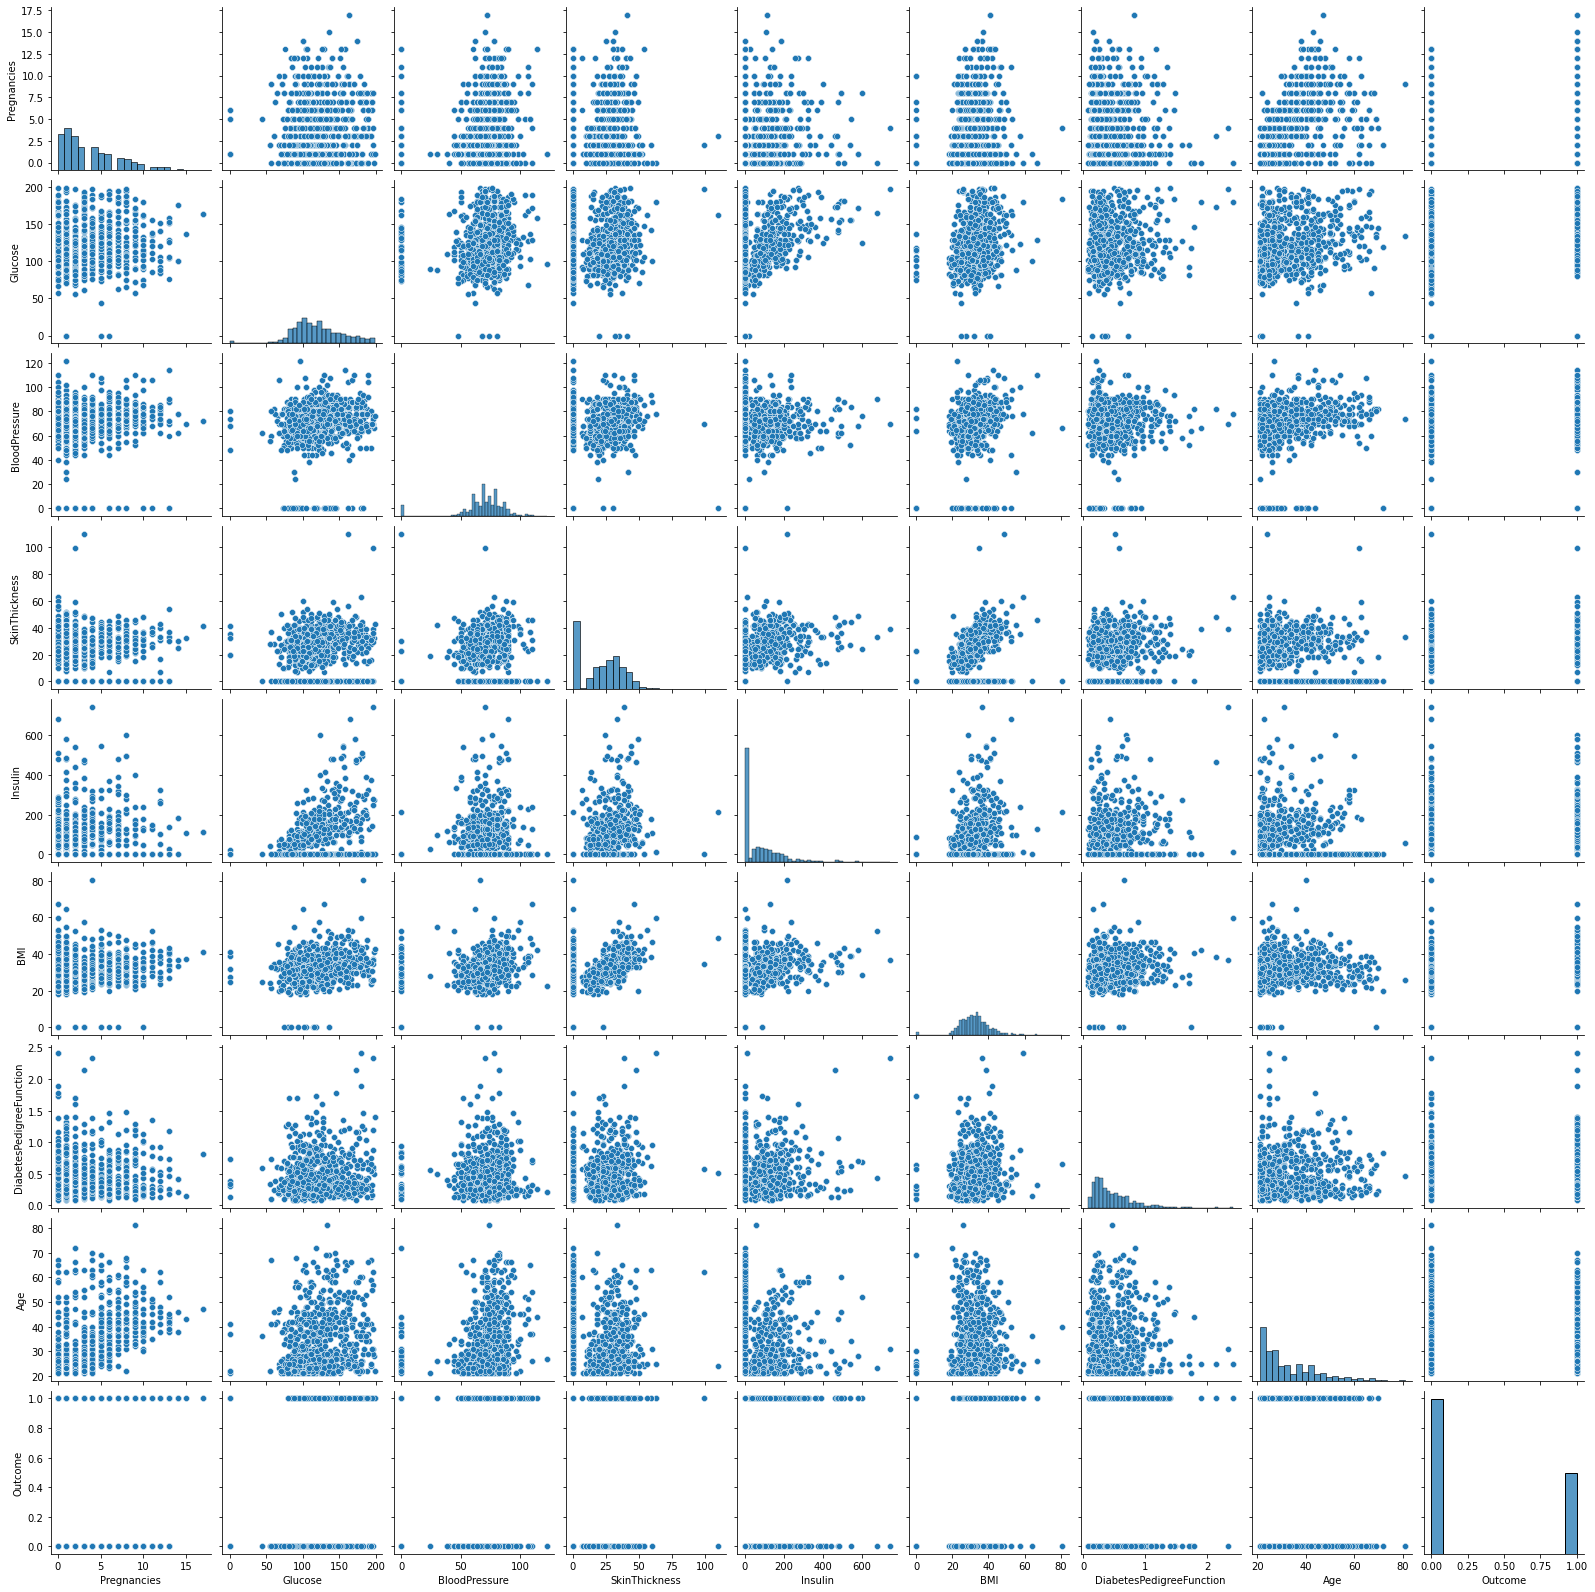

In [8]:
sns.pairplot(df)

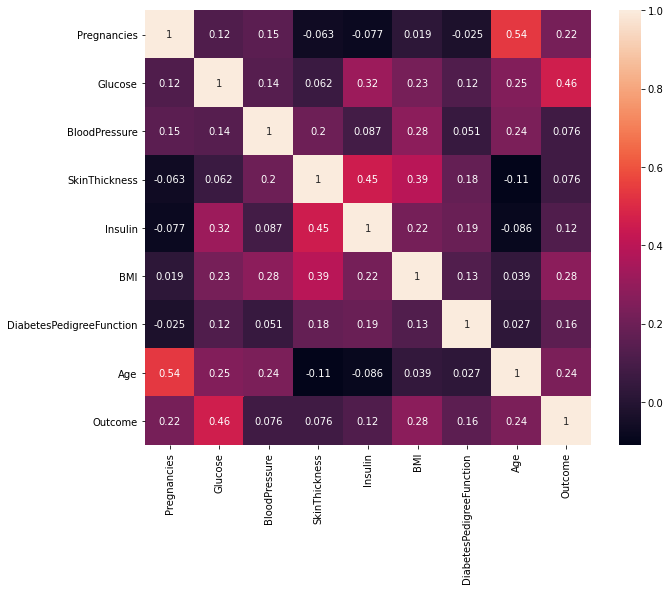

In [9]:
# plotting the corrreation
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot =True)

From the heatmap it is seen that 'glucose' and the 'outcome' has slight relation with each other as well as the 'BMI' and "age".
insulin and skin thickness are also related to each other directly,
age and pregnancies are also positively related to each other


<Figure size 720x432 with 0 Axes>

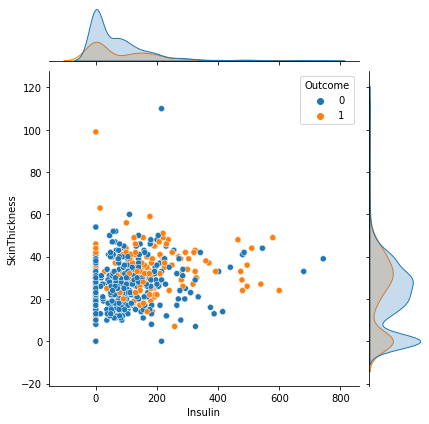

In [10]:
#visualising the realtion
plt.figure(figsize = (10,6))
sns.jointplot(x = 'Insulin', y = 'SkinThickness',data = df,kind = 'scatter',hue = 'Outcome',color = 'red')

<Figure size 720x432 with 0 Axes>

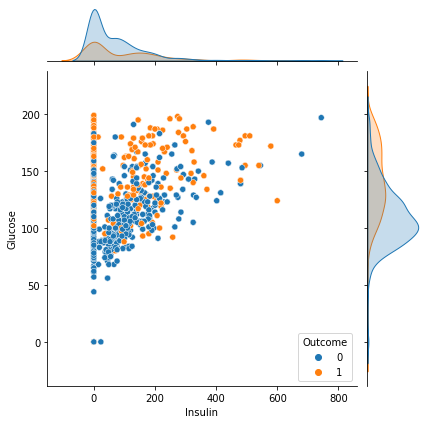

In [11]:
plt.figure(figsize = (10,6))
sns.jointplot(x = 'Insulin', y = 'Glucose',data = df,kind = 'scatter',hue = 'Outcome',color = 'red')

From the above plot it is clear that the person having insulin in the range of 150-300 and glucose level of 130-200 have mostly suffered from the diabetes

<Figure size 720x432 with 0 Axes>

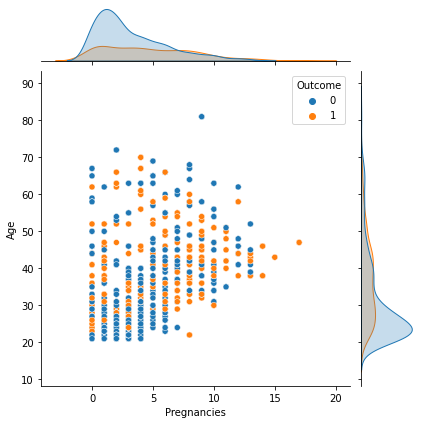

In [12]:
#visualising the realtion
plt.figure(figsize = (10,6))
sns.jointplot(x = 'Pregnancies', y = 'Age',data = df,kind = 'scatter',hue = 'Outcome',color = 'red')

# Removal Of Outliers

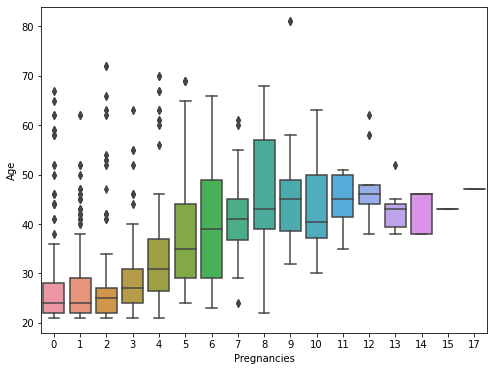

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Pregnancies',y = 'Age',data = df)

Text(0, 0.5, 'age')

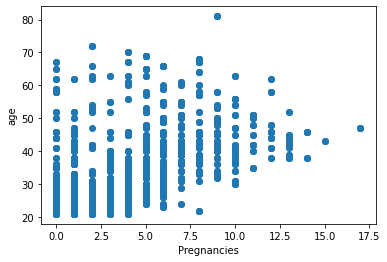

In [14]:
plt.scatter(x = 'Pregnancies',y = 'Age',data = df)
plt.xlabel('Pregnancies')
plt.ylabel('age')

In [15]:
#removal of outlier in case of pregnancies columns
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'IQR is {IQR}')
print(f'Upper limit is {upper}')
print(f'lower limit is {lower}')

6.0 1.0
IQR is 5.0
Upper limit is 13.5
lower limit is -6.5


In [16]:
df2 = df[(df['Pregnancies'] > lower) & (df['Pregnancies'] < upper)]

In [17]:
df2.shape

(1988, 9)

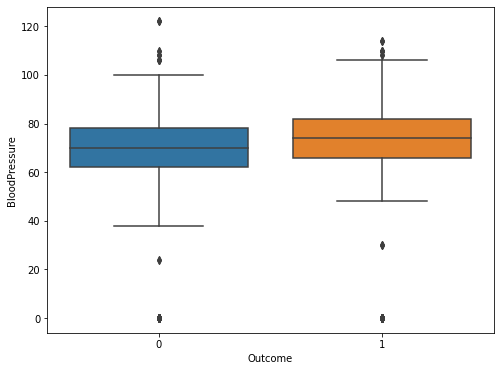

In [18]:
#for blood pressure
plt.figure(figsize = (8,6))
sns.boxplot(x ='Outcome',y = 'BloodPressure',data = df2)

In [19]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'IQR is {IQR}')
print(f'Upper limit is {upper}')
print(f'lower limit is {lower}')

80.0 63.5
IQR is 16.5
Upper limit is 104.75
lower limit is 38.75


In [20]:
df3 = df2[(df2['BloodPressure'] > lower) & (df2['BloodPressure'] < upper)]

In [21]:
df3.shape

(1863, 9)

In [22]:
# removal of outlier for insulin
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'IQR is {IQR}')
print(f'Upper limit is {upper}')
print(f'lower limit is {lower}')

130.0 0.0
IQR is 130.0
Upper limit is 325.0
lower limit is -195.0


In [23]:
df4 = df3[(df3['Insulin'] > lower) & (df3['Insulin'] < upper)]

In [24]:
df4.shape

(1781, 9)

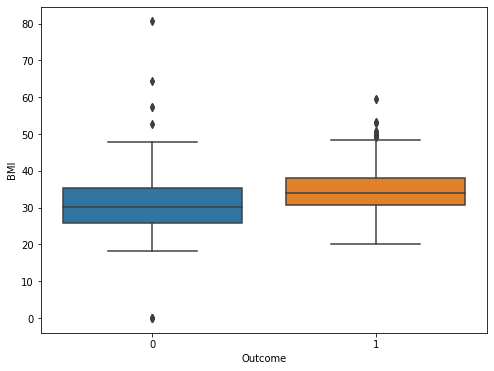

In [25]:
# for BMI
plt.figure(figsize = (8,6))
sns.boxplot(x ='Outcome',y = 'BMI',data = df4)

In [26]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'IQR is {IQR}')
print(f'Upper limit is {upper}')
print(f'lower limit is {lower}')

36.8 27.374999999999996
IQR is 9.425
Upper limit is 50.9375
lower limit is 13.237499999999995


In [27]:
df5 = df4[(df4['BMI'] > lower) & (df4['BMI'] < upper)]

In [28]:
df5.shape

(1754, 9)

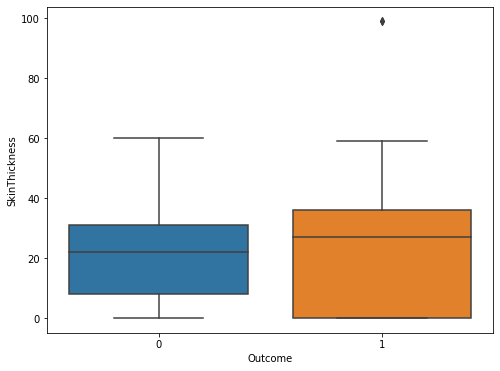

In [29]:
# for skinthickness
plt.figure(figsize = (8,6))
sns.boxplot(x ='Outcome',y = 'SkinThickness',data = df5)

In [30]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,Q1)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'IQR is {IQR}')
print(f'Upper limit is {upper}')
print(f'lower limit is {lower}')

32.0 0.0
IQR is 32.0
Upper limit is 80.0
lower limit is -48.0


In [31]:
df6 = df5[(df5['SkinThickness'] > lower) & (df5['SkinThickness'] < upper)]

In [32]:
df6.shape

(1752, 9)

In [33]:
df6.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0
10,4,99,68,38,0,32.8,0.145,33,0
11,4,125,70,18,122,28.9,1.144,45,1


In [34]:
# finding the total number of the enteries which have insulin level as 0
df[df['Insulin'] == 0].shape

(956, 9)

In [35]:
# filling the points where insulin level is 0
def insulin(x):
    if x==0:
        return np.mean(df6['Insulin'])
    else:
        return x
    
    

In [36]:
df7 = df6.copy()

In [37]:
df7['insulin']=df7['Insulin'].apply(insulin)

In [38]:
df7.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin
0,2,138,62,35,0,33.6,0.127,47,1,67.170662
1,0,84,82,31,125,38.2,0.233,23,0,125.000000
3,0,135,68,42,250,42.3,0.365,24,1,250.000000
5,0,173,78,32,265,46.5,1.159,58,0,265.000000
6,4,99,72,17,0,25.6,0.294,28,0,67.170662
7,8,194,80,0,0,26.1,0.551,67,0,67.170662
8,2,83,65,28,66,36.8,0.629,24,0,66.000000
9,2,89,90,30,0,33.5,0.292,42,0,67.170662
10,4,99,68,38,0,32.8,0.145,33,0,67.170662
11,4,125,70,18,122,28.9,1.144,45,1,122.000000


In [39]:
df8 = df7.drop('Insulin',axis = 1)

In [40]:
df8.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin
0,2,138,62,35,33.6,0.127,47,1,67.170662
1,0,84,82,31,38.2,0.233,23,0,125.000000
3,0,135,68,42,42.3,0.365,24,1,250.000000
5,0,173,78,32,46.5,1.159,58,0,265.000000
6,4,99,72,17,25.6,0.294,28,0,67.170662
7,8,194,80,0,26.1,0.551,67,0,67.170662
8,2,83,65,28,36.8,0.629,24,0,66.000000
9,2,89,90,30,33.5,0.292,42,0,67.170662
10,4,99,68,38,32.8,0.145,33,0,67.170662
11,4,125,70,18,28.9,1.144,45,1,122.000000


In [41]:
df8[df8['SkinThickness'] ==0].shape

(470, 9)

In [42]:
#sinmilarly for skin thickness as skin thickness cannot be zero
def apply_thickness(x):
    if x == 0:
        return np.mean(df8['SkinThickness'])
    else:
        return x
    


In [43]:
skin_thickness=df8['SkinThickness'].apply(apply_thickness)

In [44]:
df8.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin
0,2,138,62,35,33.6,0.127,47,1,67.170662
1,0,84,82,31,38.2,0.233,23,0,125.000000
3,0,135,68,42,42.3,0.365,24,1,250.000000
5,0,173,78,32,46.5,1.159,58,0,265.000000
6,4,99,72,17,25.6,0.294,28,0,67.170662


In [45]:
df8['skin_thickness'] = skin_thickness

In [46]:
df8.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin,skin_thickness
0,2,138,62,35,33.6,0.127,47,1,67.170662,35.000000
1,0,84,82,31,38.2,0.233,23,0,125.000000,31.000000
3,0,135,68,42,42.3,0.365,24,1,250.000000,42.000000
5,0,173,78,32,46.5,1.159,58,0,265.000000,32.000000
6,4,99,72,17,25.6,0.294,28,0,67.170662,17.000000
7,8,194,80,0,26.1,0.551,67,0,67.170662,20.996005
8,2,83,65,28,36.8,0.629,24,0,66.000000,28.000000
9,2,89,90,30,33.5,0.292,42,0,67.170662,30.000000
10,4,99,68,38,32.8,0.145,33,0,67.170662,38.000000
11,4,125,70,18,28.9,1.144,45,1,122.000000,18.000000


In [47]:
df8 = df8.drop('SkinThickness',axis = 1)

In [48]:
df8.head(10)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin,skin_thickness
0,2,138,62,33.6,0.127,47,1,67.170662,35.000000
1,0,84,82,38.2,0.233,23,0,125.000000,31.000000
3,0,135,68,42.3,0.365,24,1,250.000000,42.000000
5,0,173,78,46.5,1.159,58,0,265.000000,32.000000
6,4,99,72,25.6,0.294,28,0,67.170662,17.000000
7,8,194,80,26.1,0.551,67,0,67.170662,20.996005
8,2,83,65,36.8,0.629,24,0,66.000000,28.000000
9,2,89,90,33.5,0.292,42,0,67.170662,30.000000
10,4,99,68,32.8,0.145,33,0,67.170662,38.000000
11,4,125,70,28.9,1.144,45,1,122.000000,18.000000


# Model Prediction

# Random Forest Classifier

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df8.drop('Outcome',axis = 1)
y = df8['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,insulin,skin_thickness
635,13,104,72,31.2,0.465,38,67.170662,20.996005
1080,0,94,70,43.5,0.347,21,115.000000,27.000000
670,6,165,68,33.6,0.631,49,168.000000,26.000000
1975,8,188,78,47.9,0.137,43,67.170662,20.996005
388,5,144,82,32.0,0.452,58,285.000000,26.000000
166,3,148,66,32.5,0.256,22,67.170662,25.000000
408,8,197,74,25.9,1.191,39,67.170662,20.996005
94,2,142,82,24.7,0.761,21,64.000000,18.000000
53,8,176,90,33.7,0.467,58,300.000000,34.000000
531,0,107,76,45.3,0.686,24,67.170662,20.996005


In [52]:
X_train.shape

(1173, 8)

In [53]:
X_test.shape

(579, 8)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rvc = RandomForestClassifier(n_estimators=400)

In [55]:
rvc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
predict = rvc.predict(X_test)

In [57]:
rvc.score(X_train,y_train)

1.0

In [76]:
scores=rvc.score(X_test,y_test)
print(f'Accuracy over testing set {scores*100}%')

Accuracy over testing set 97.92746113989638%


In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[390   0]
 [ 12 177]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       390
           1       1.00      0.94      0.97       189

    accuracy                           0.98       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.98      0.98      0.98       579



# Support vector Classifier using GridSearchCV

In [61]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',degree=3,)
from sklearn.model_selection import GridSearchCV

In [62]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
pred = model.predict(X_test)

In [78]:
svm_score=model.score(X_test,y_test)
print(f'Accuracy over testing set {svm_score*100}%')

Accuracy over testing set 76.3385146804836%


In [ ]:
print()

In [64]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[360  30]
 [107  82]]


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       390
           1       0.73      0.43      0.54       189

    accuracy                           0.76       579
   macro avg       0.75      0.68      0.69       579
weighted avg       0.76      0.76      0.74       579



In [65]:
param = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param,verbose = 5)

In [66]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.681, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.681, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.685, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.681, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.681, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.685, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.681, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [67]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [68]:
predictions = grid.predict(X_test)

In [80]:
grid_score = grid.score(X_test, y_test)
print(f'Accuracy over testing set {grid_score*100}%')

Accuracy over testing set 94.47322970639033%


In [69]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[390   0]
 [ 32 157]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       390
           1       1.00      0.83      0.91       189

    accuracy                           0.94       579
   macro avg       0.96      0.92      0.93       579
weighted avg       0.95      0.94      0.94       579



# **Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
lr_predictions = lr.predict(X_test)

In [72]:
lr.score(X_train,y_train)

0.7851662404092071

In [73]:
lr.score(X_test,y_test)

0.7806563039723662

In [74]:
print(confusion_matrix(y_test,lr_predictions))
print('\n')
print(classification_report(y_test,lr_predictions))

[[355  35]
 [ 92  97]]


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       390
           1       0.73      0.51      0.60       189

    accuracy                           0.78       579
   macro avg       0.76      0.71      0.73       579
weighted avg       0.77      0.78      0.77       579

